### IMDB 영화 리뷰 감성 분석 - Conv1D
 - Conv1D + Conv1D
 - Conv1D + LSTM + Dense
 - Conv1D + Dense + Desne

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
num_words = 10000
(X_train, y_train), (_, _) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.2,
    random_state = seed
)

In [5]:
max_len = 500
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
X_train.shape, X_test.shape

((20000, 500), (5000, 500))

- Case1) Conv1D x 2

In [6]:
model1 = Sequential([
    Embedding(num_words, 100, input_length = max_len),
    Dropout(0.5),
    Conv1D(64, 7, activation='relu'),
    MaxPool1D(7),
    Conv1D(64, 5, activation='relu'),
    MaxPool1D(5),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 500, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 494, 64)           44864     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 70, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 66, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 64)           0         
 1D)                                                    

In [9]:
model1.compile('adam', 'binary_crossentropy', ['accuracy'])
model_path1 = 'best-imdb-conv1d-conv1d.h5'
mc = ModelCheckpoint(model_path1, verbose=1, best_save_only = True)
es = EarlyStopping(patience=5)

hist1 = model1.fit(X_train, y_train, validation_split = 0.2,
          epochs = 100, batch_size = 64, 
          callbacks=[mc, es])

Epoch 1/100
247/250 [============================>.] - ETA: 0s - loss: 0.5603 - accuracy: 0.6740
Epoch 1: saving model to best-imdb-conv1d-conv1d.h5
250/250 [==============================] - 16s 10ms/step - loss: 0.5573 - accuracy: 0.6764 - val_loss: 0.3584 - val_accuracy: 0.8490
Epoch 2/100
245/250 [============================>.] - ETA: 0s - loss: 0.2877 - accuracy: 0.8827
Epoch 2: saving model to best-imdb-conv1d-conv1d.h5
250/250 [==============================] - 2s 9ms/step - loss: 0.2884 - accuracy: 0.8824 - val_loss: 0.3217 - val_accuracy: 0.8622
Epoch 3/100
245/250 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.9272
Epoch 3: saving model to best-imdb-conv1d-conv1d.h5
250/250 [==============================] - 2s 9ms/step - loss: 0.1945 - accuracy: 0.9273 - val_loss: 0.3474 - val_accuracy: 0.8568
Epoch 4/100
249/250 [============================>.] - ETA: 0s - loss: 0.1300 - accuracy: 0.9530
Epoch 4: saving model to best-imdb-conv1d-conv1d.h5
250/250 [

In [10]:
best_model1 = load_model(model_path1)
best_model1.evaluate(X_test, y_test)

157/157 [==============================] - 1s 3ms/step - loss: 0.6030 - accuracy: 0.8590


[0.6029945015907288, 0.859000027179718]

In [11]:
y_acc1 = hist1.history['accuracy']
y_loss1 = hist1.history['loss']
xs1 = np.arange(1, len(y_acc1) + 1)

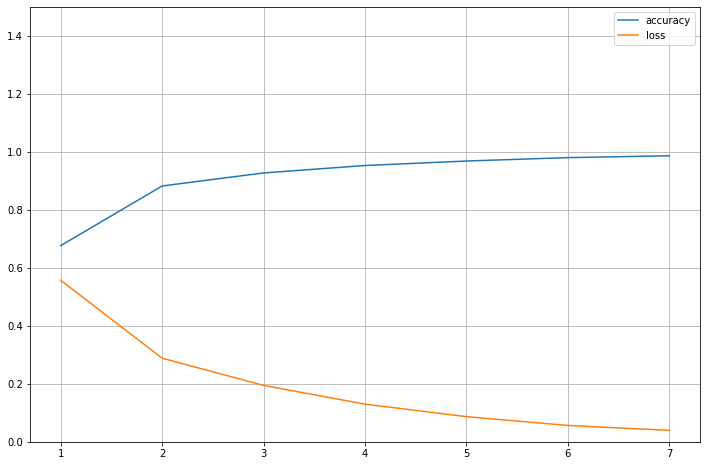

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs1, y_acc1, label='accuracy')
plt.plot(xs1, y_loss1, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()

- Case2) Conv1D + LSTM

In [13]:
model2 = Sequential([
    Embedding(num_words, 100, input_length = max_len),
    Dropout(0.5),
    Conv1D(64, 5, activation='relu'),
    MaxPool1D(5),
    LSTM(100),
    Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 dropout_1 (Dropout)         (None, 500, 100)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 496, 64)           32064     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                      

In [14]:
model2.compile('adam', 'binary_crossentropy', ['accuracy'])
model2_path = 'best-imdb-conv1d-LSTM.h5'
mc = ModelCheckpoint(model2_path, verbose=1, best_save_only = True)
es = EarlyStopping(patience=5)

hist2 = model2.fit(X_train, y_train, validation_split = 0.2,
          epochs = 100, batch_size = 64, 
          callbacks=[mc, es])

Epoch 1/100
247/250 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.7660
Epoch 1: saving model to best-imdb-conv1d-LSTM.h5
250/250 [==============================] - 7s 17ms/step - loss: 0.4409 - accuracy: 0.7677 - val_loss: 0.2957 - val_accuracy: 0.8820
Epoch 2/100
247/250 [============================>.] - ETA: 0s - loss: 0.2159 - accuracy: 0.9155
Epoch 2: saving model to best-imdb-conv1d-LSTM.h5
250/250 [==============================] - 4s 14ms/step - loss: 0.2167 - accuracy: 0.9152 - val_loss: 0.2654 - val_accuracy: 0.8905
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.1416 - accuracy: 0.9489
Epoch 3: saving model to best-imdb-conv1d-LSTM.h5
250/250 [==============================] - 3s 13ms/step - loss: 0.1416 - accuracy: 0.9489 - val_loss: 0.2951 - val_accuracy: 0.8805
Epoch 4/100
246/250 [============================>.] - ETA: 0s - loss: 0.0984 - accuracy: 0.9670
Epoch 4: saving model to best-imdb-conv1d-LSTM.h5
250/250 [=======

In [16]:
best_model2 = load_model(model2_path)
best_model2.evaluate(X_test, y_test)

157/157 [==============================] - 1s 5ms/step - loss: 0.4371 - accuracy: 0.8764


[0.43713638186454773, 0.8763999938964844]

In [17]:
y_acc2 = hist1.history['accuracy']
y_loss2 = hist1.history['loss']
xs2 = np.arange(1, len(y_acc2) + 1)

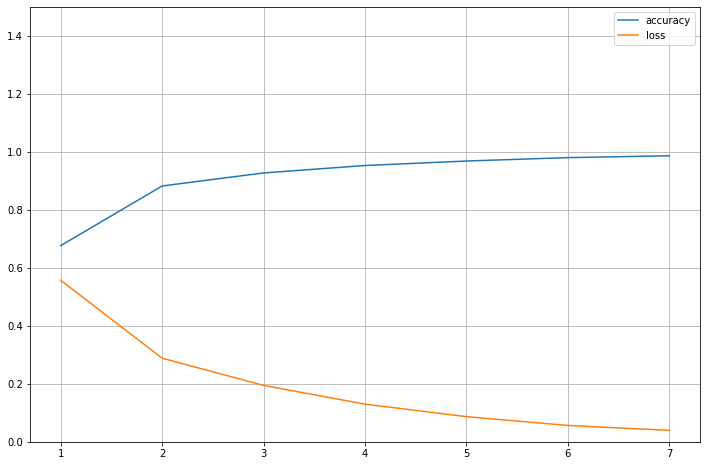

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs2, y_acc2, label='accuracy')
plt.plot(xs2, y_loss2, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()

- Case3) Conv1D + Dense

In [24]:
model3 = Sequential([
    Embedding(num_words, 100, input_length = max_len),
    Dropout(0.5),
    Conv1D(64, 5, activation='relu'),
    MaxPool1D(5),
    GlobalMaxPooling1D(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 dropout_4 (Dropout)         (None, 500, 100)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 496, 64)           32064     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 99, 64)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 100)              

In [25]:
model3.compile('adam', 'binary_crossentropy', ['accuracy'])
model3_path = 'best-imdb-conv1d-Dense.h5'
mc = ModelCheckpoint(model3_path, verbose=1, best_save_only = True)
es = EarlyStopping(patience=5)

hist3 = model3.fit(X_train, y_train, validation_split = 0.2,
          epochs = 100, batch_size = 64, 
          callbacks=[mc, es])

Epoch 1/100
246/250 [============================>.] - ETA: 0s - loss: 0.5790 - accuracy: 0.6631
Epoch 1: saving model to best-imdb-conv1d-Dense.h5
250/250 [==============================] - 3s 9ms/step - loss: 0.5759 - accuracy: 0.6658 - val_loss: 0.3881 - val_accuracy: 0.8275
Epoch 2/100
250/250 [==============================] - ETA: 0s - loss: 0.3112 - accuracy: 0.8684
Epoch 2: saving model to best-imdb-conv1d-Dense.h5
250/250 [==============================] - 2s 9ms/step - loss: 0.3112 - accuracy: 0.8684 - val_loss: 0.3092 - val_accuracy: 0.8733
Epoch 3/100
246/250 [============================>.] - ETA: 0s - loss: 0.2054 - accuracy: 0.9204
Epoch 3: saving model to best-imdb-conv1d-Dense.h5
250/250 [==============================] - 2s 8ms/step - loss: 0.2052 - accuracy: 0.9204 - val_loss: 0.2912 - val_accuracy: 0.8827
Epoch 4/100
250/250 [==============================] - ETA: 0s - loss: 0.1348 - accuracy: 0.9517
Epoch 4: saving model to best-imdb-conv1d-Dense.h5
250/250 [======

In [26]:
best_model3 = load_model(model3_path)
best_model3.evaluate(X_test, y_test)

157/157 [==============================] - 1s 3ms/step - loss: 0.4554 - accuracy: 0.8806


[0.45538729429244995, 0.8805999755859375]

In [27]:
y_acc3 = hist1.history['accuracy']
y_loss3 = hist1.history['loss']
xs3 = np.arange(1, len(y_acc3) + 1)

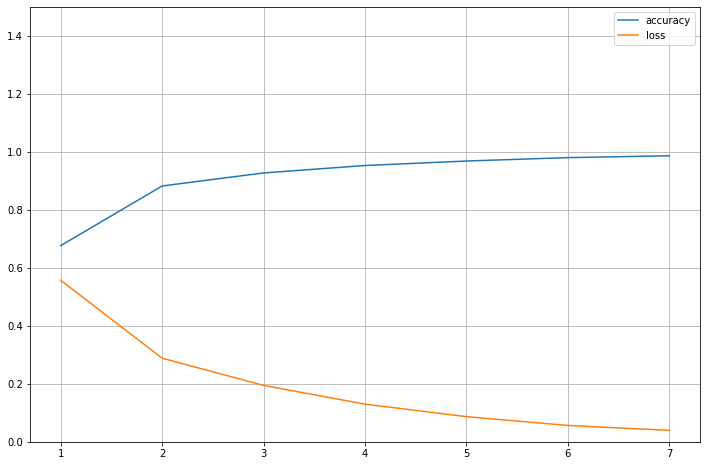

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs3, y_acc3, label='accuracy')
plt.plot(xs3, y_loss3, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()